# AutoML para previsão de Churn
Nesse projeto eu irei aplicar a biblioteca de Auto Machine Learning Auto-Sklearn para gerar um modelo que preveja o Churn de clientes de uma empresa de Telecomunicações. A vantagem do processo de Auto Machine Learning é que todo processo de escolha, treinamento e tunning do modelo é algo automático, permitindo que tempo e esforço sejam aplicados para outras áreas do projeto.

# O que é churn ?
Churn é uma métrica que indica o quanto uma empresa perdeu de receita ou clientes. Para calcular o churn, basta dividir a quantidade de clientes que perdeu até o final do período pelo total de clientes que iniciaram. Exemplo: se você perdeu 10 clientes de 100 = 10% de churn rate. Essa métrica também usada em departamentos de pessoas para analisar a rotatividade de funcionários de uma empresa em um determinado setor ou em toda a empresa.

# Dados
Os dados são da plataforma Kaggle e podem ser obtidos aqui. A base de dados conta com 7043 observações e 21 colunas.

Nessas features constam :

* Clientes que saíram no último mês - a coluna é chamada de churn;

* Serviços que cada cliente assinou - telefone, várias linhas, internet, segurança online, backup online, proteção de dispositivo, suporte técnico e streaming de TV e filmes;

* Informações da conta do cliente - há quanto tempo ele é cliente, contrato, forma de pagamento, faturamento sem papel, cobranças mensais e cobranças totais;

* e informações demográficas sobre clientes - sexo, faixa etária e se eles têm parceiros e dependentes;

# Descrição das variáveis

customerID : Código do cliente;

gender : Gênero do cliente;

SeniorCitizen : Se o cliente é um cidadão idoso ou não (1, 0);

Partner : Se o cliente tem um parceiro ou não (Sim, Não);

Dependents : Se o cliente tem dependentes ou não (Sim, Não);

tenure : Número de meses que o cliente permaneceu na empresa;

PhoneService : Se o cliente tem um serviço de telefone ou não (Sim, Não);

MultipleLines : Se o cliente tem várias linhas ou não (Sim, Não, Sem serviço telefônico);

InternetService : Provedor de serviços de Internet do cliente (DSL, fibra óptica, não);

OnlineSecurity : Se o cliente tem segurança online ou não (Sim, Não, Sem serviço de Internet);

OnlineBackup : Se o cliente tem backup online ou não (Sim, Não, Sem serviço de Internet);

DeviceProtection : Se o cliente tem proteção de dispositivo ou não (Sim, Não, Sem serviço de Internet);

TechSupport : Se o cliente tem suporte técnico ou não (Sim, Não, Sem serviço de Internet);

StreamingTV : Se o cliente tem streaming de TV ou não (Sim, Não, Sem serviço de Internet);

StreamingMovies : Se o cliente tem streaming de filmes ou não (Sim, Não, Sem serviço de Internet);

Contract : A vigência do contrato do cliente (mês a mês, um ano, dois anos);

PaperlessBilling : Se o cliente tem faturamento sem papel ou não (Sim, Não);

PaymentMethod : O método de pagamento do cliente (cheque eletrônico, cheque enviado, transferência bancária (automático),etc.;

MonthlyCharges : O valor cobrado do cliente mensalmente;

TotalCharges : O valor total cobrado do cliente;

Churn : Se o cliente mudou ou não (sim ou não).

## Instalação das bibliotecas

# Importando as bibliotecas

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder



# Dataset

In [2]:
churn = pd.read_csv('/content/drive/MyDrive/AutoML/Auto_scklearn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

## Análise Exploratória dos dados
Primeiras observações da base de dados.

In [3]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Últimas observações da base de dados.

In [4]:
churn.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


Informações sobre as variáveis: Das 21 variáveis, 18 são objetos (valores não numéricos), por isso teremos que transformá-las em numéricas para que possam ser aplicadas no processo de auto machine learning.

In [5]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Número de valores únicos de cada coluna.

In [6]:
churn.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

**Não há valores faltantes.**

In [7]:
churn.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
print('Tabela estatística das variáveis numéricas')
display(churn.describe().T)
print(' '*508)
print("Tabela estatística das variáveis categóricas")
display(churn.describe(include='O').T)

Tabela estatística das variáveis numéricas


,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
Tabela estatística das variáveis categóricas


,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


Dimensão da base de dados.

In [9]:
churn.shape

(7043, 21)

# Transformações dos dados

In [26]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Observe que TotalCharges é do tipo object em vez de float64. Investigando, descobri que há alguns espaços em branco nesta coluna que fizeram o Python forçar o tipo de dados como object. Para consertar isso, teremos que tirar os espaços em branco antes de alterar o tipo de dados.

Antes de seguir para a análise gráfica é necessário transformar os dados para valores numéricos categóricos, pois muitos estão em formato de texto.

Antes irei excluir a coluna customerID, pois ele não é relevante para nossa modelagem.

In [27]:
#Base que usarei para realizar a análise exploratória de dados
churn2=churn
churn2['Churn'] = LabelEncoder().fit_transform(churn2['Churn'])
churn = churn.drop('customerID', axis=1)
     

Selecionarei todas as colunas que são do tipo objeto.

Com o uso do loop for irei transformar as variáveis categóricas em numéricas categóricas.

In [28]:
churn.select_dtypes(['int64','float64']).columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Churn'], dtype='object')

In [29]:
lista3 = ['tenure','MonthlyCharges']
for i in lista3:
  churn[i] = (churn[i] - churn[i].mean())/(churn[i].std())

  #SeniorCitizen não é INT64
  #Transformar TotalCharges de object para Float

Transformando as variáveis objetos em variáveis numéricas.

In [30]:
#churn['Churn'] = LabelEncoder().fit_transform(churn['Churn'])

for i in churn.select_dtypes('object').columns:
  churn[i] = LabelEncoder().fit_transform(churn[i])
     

Abaixo podemos ver que a transformação foi efetuada.

In [31]:
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.277354,0,1,0,0,2,0,0,0,0,0,1,2,-1.160241,2505,0
1,1,0,0,0,0.066323,1,0,0,2,0,2,0,0,0,1,0,3,-0.259611,1466,0
2,1,0,0,0,-1.236636,1,0,0,2,2,0,0,0,0,0,1,3,-0.362635,157,1
3,1,0,0,0,0.514215,0,1,0,2,0,2,2,0,0,1,0,0,-0.746482,1400,0
4,0,0,0,0,-1.236636,1,0,1,0,0,0,0,0,0,0,1,2,0.197351,925,1


E o tipo de dados da base também foi alterado para inteiro (int64).

In [32]:
churn.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure              float64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges          int64
Churn                 int64
dtype: object

## Análise gráfica

Intuitivamente, contract type, tenure (tempo de permanência do cliente) e pricing plans são informações muito importantes quando se trata de rotatividade ou retenção de clientes. Vamos explorar o relacionamento:

In [33]:
import plotly.express as px
	

fig = px.scatter(x=churn['tenure'], y=churn['TotalCharges'], 
                 color = churn['Churn'], template = 'presentation', 
                 opacity = 0.5, facet_col = churn['Contract'], 
                 title = 'Customer Churn by Tenure, Charges, and Contract Type',
                 labels = {'x' : 'Customer Tenure', 'y' : 'Total Charges $'})
	                
fig.show()

**Observe que a maior parte do churn pode ser vista nos contratos de “mês a mês”. Faz sentido, é claro. Além disso, posso ver que, à medida que a estabilidade (tenure) aumenta e também os encargos totais (total charges), a probabilidade de clientes com alta estabilidade e encargos baixos é menor em comparação com clientes com alta estabilidade e encargos elevados.**

Conforme os gráficos de barras abaixo temos que:

* Não aparenta haver diferença entre clientes que deixam a empresa quando tratamos de gênero;

* Já para a variável SeniorCitizen, aqueles não idosos são maioria entre os que deixam de ser clientes da empresa.

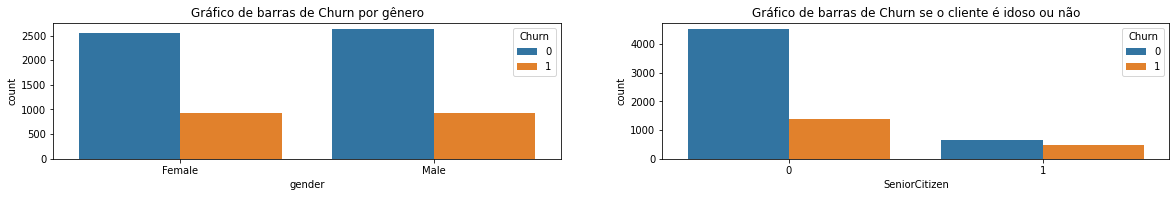

In [34]:
fig, ax=plt.subplots(1,2,figsize=(20,2.5))
ax[0].title.set_text('Gráfico de barras de Churn por gênero')
ax[1].title.set_text('Gráfico de barras de Churn se o cliente é idoso ou não')
sns.countplot(x='gender', data=churn2, hue='Churn', ax=ax[0])
sns.countplot(x='SeniorCitizen', data=churn2, hue='Churn', ax=ax[1]);

* Na variável MultipleLines, quem possui e não possui múltiplas linhas telefônicas são os que mais deixam de ser clientes;

* Em PhoneService, deixam de ser clientes aqueles indivíduos que possuem algum serviço telefônico.

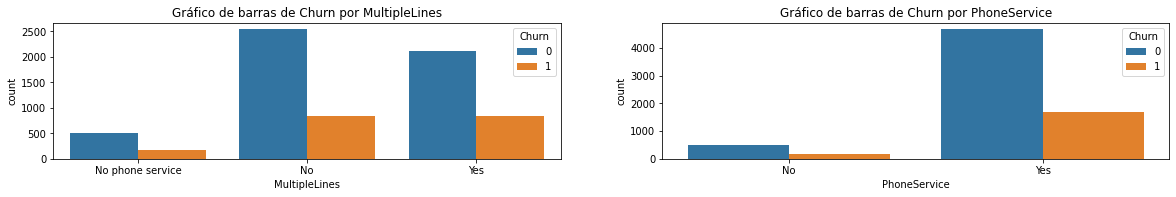

In [35]:
fig, ax=plt.subplots(1,2,figsize=(20,2.5))
ax[0].title.set_text('Gráfico de barras de Churn por MultipleLines')
ax[1].title.set_text('Gráfico de barras de Churn por PhoneService')
sns.countplot(x='MultipleLines', data=churn2, hue='Churn', ax=ax[0])
sns.countplot(x='PhoneService', data=churn2, hue='Churn', ax=ax[1]);
     

No gráfico abaixo vemos o número de meses que um cliente tem até deixar a empresa. Nos primeiros meses, são os meses em que há um maior churn de clientes (podemos ver que o primeiro ano como clientes é crucial) e em seguida a quantidade de clientes que deixam a empresa vai caindo.

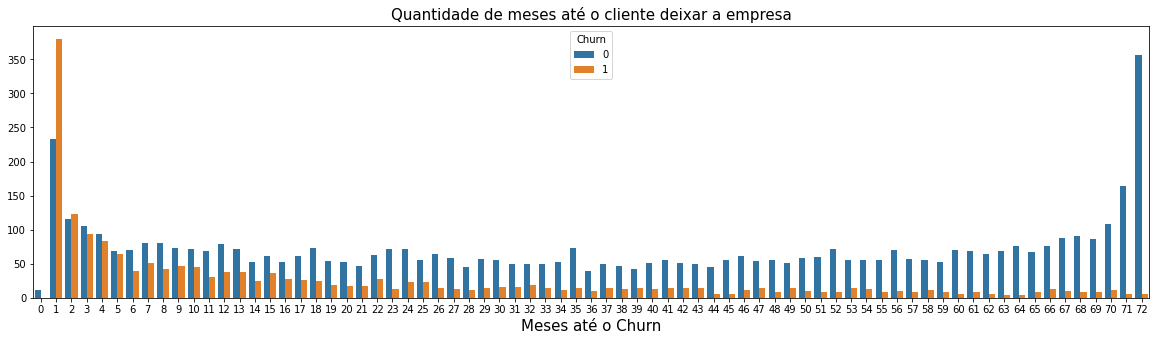

In [36]:
plt.figure(figsize=(20,5))
sns.countplot(x='tenure', data=churn2, hue='Churn')
plt.ylabel('')
plt.xlabel('Meses até o Churn',size=15)
plt.title('Quantidade de meses até o cliente deixar a empresa',size=15);

* Em InternetService, a quantidade maior de churn vem de clientes que possuíam o serviço de Fibra Ótica;

* E indivíduos que não possuem segurança online (OnlineSecurity), são os que mais deixam de ser clientes;

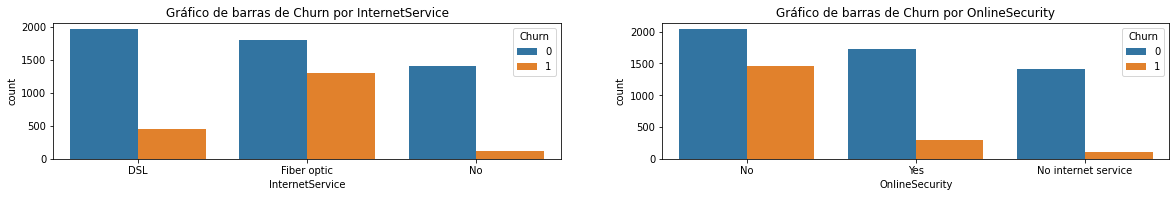

In [37]:
fig, ax=plt.subplots(1,2,figsize=(20,2.5))
ax[0].title.set_text('Gráfico de barras de Churn por InternetService')
ax[1].title.set_text('Gráfico de barras de Churn por OnlineSecurity')
sns.countplot(x='InternetService', data=churn2, hue='Churn', ax=ax[0])
sns.countplot(x='OnlineSecurity', data=churn2, hue='Churn', ax=ax[1]);

* Aqueles que não possuem backup online são os que mais deixam de ser clientes;

* DeviceProtection : Clientes sem proteção de dispositivo são os que mais deixam de ser clientes;



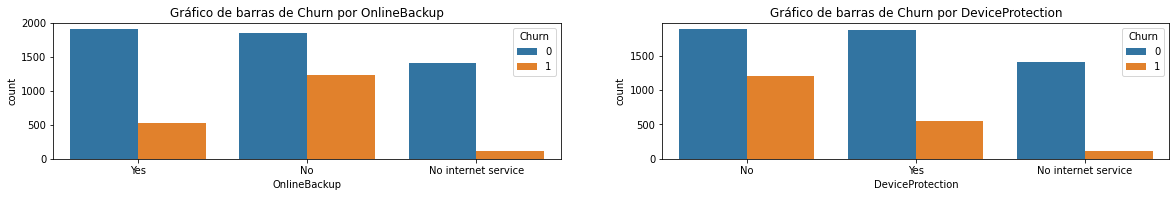

In [38]:
fig, ax=plt.subplots(1,2,figsize=(20,2.5))
ax[0].title.set_text('Gráfico de barras de Churn por OnlineBackup')
ax[1].title.set_text('Gráfico de barras de Churn por DeviceProtection')
sns.countplot(x='OnlineBackup', data=churn2, hue='Churn', ax=ax[0])
sns.countplot(x='DeviceProtection', data=churn2, hue='Churn', ax=ax[1]);

* TechSupport : Quem não possui suporte técnico são os que mais deixam de serem clientes;

* StreamingTV : Nessa variável que possui e não possui sistema de Streaming debandam da carteira de clientes da empresa;

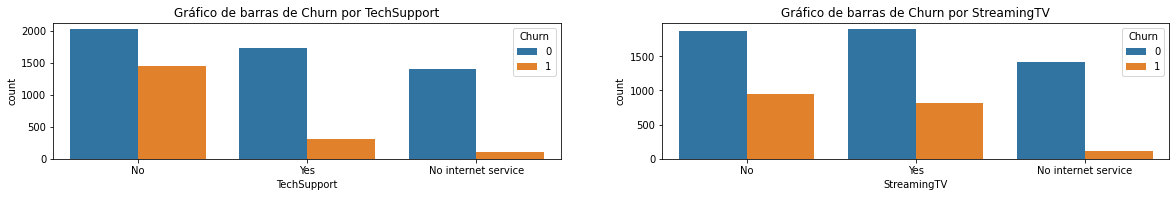

In [39]:
fig, ax=plt.subplots(1,2,figsize=(20,2.5))
ax[0].title.set_text('Gráfico de barras de Churn por TechSupport')
ax[1].title.set_text('Gráfico de barras de Churn por StreamingTV')
sns.countplot(x='TechSupport', data=churn2, hue='Churn', ax=ax[0])
sns.countplot(x='StreamingTV', data=churn2, hue='Churn', ax=ax[1]);

* StreamingMovies : Resultado semelhante aos da variável StreamingTV;

* Quem faz contrato mês a mês (month-to-month) são os que mais deixam de serem clientes;

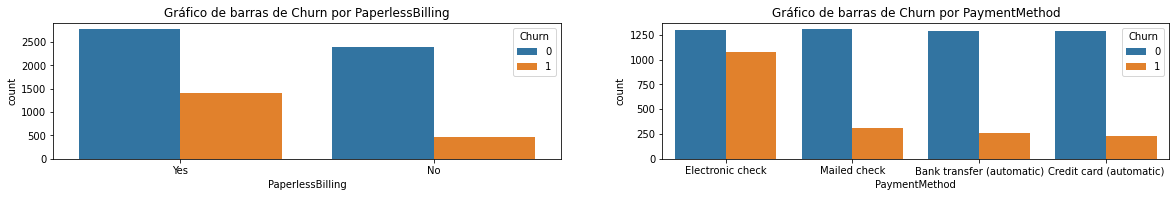

In [40]:
fig, ax=plt.subplots(1,2,figsize=(20,2.5))
ax[0].title.set_text('Gráfico de barras de Churn por PaperlessBilling')
ax[1].title.set_text('Gráfico de barras de Churn por PaymentMethod')
sns.countplot(x='PaperlessBilling', data=churn2, hue='Churn', ax=ax[0])
sns.countplot(x='PaymentMethod', data=churn2, hue='Churn', ax=ax[1]);

Abaixo pode-se pobservar o histograma e o boxplot da variável MonthlyCharges.

A distribuição dos dados não possui a aparência de uma distribuição normal (formato de sino) e o seu boxplot não mostra a presença de valores discrepantes nos dados (outliers).

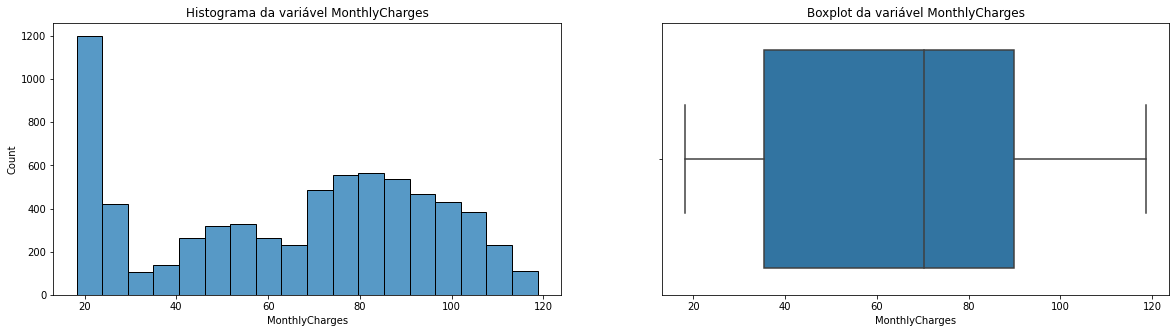

In [41]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
ax[0].title.set_text('Histograma da variável MonthlyCharges')
ax[1].title.set_text('Boxplot da variável MonthlyCharges')
sns.histplot(x='MonthlyCharges', data=churn2, ax=ax[0])
sns.boxplot(x='MonthlyCharges', data=churn2, ax=ax[1]);

# Modelagem de dados

Separando as features e a variável target (alvo).

In [42]:
X=churn.drop(["Churn",'TotalCharges'],axis=1)
y=churn['Churn']

Um dos problemas da variável Churn as suas classes estão desbalanceadas e isso traz um problema na momento de treino do algoritmo em que o modelo irá aprender mais de um padrão de uma classe do que da outra. Para solucionar esse problema é necessário realizar um procedimento chamado de rebalanceamento das classes, que pode ser aumentando artificialmente o número de observações da classe minoritária (Oversampling), ou minimizando o número de observações da classe marjoritária (Undersampling) ou combinando essas técnicas.

Abaixo vemos o desbalancemento das classes: temos mais da classe 0 do que a classe 1 (que é a que queremos prever - se o cliente deixa ou não a empresa).

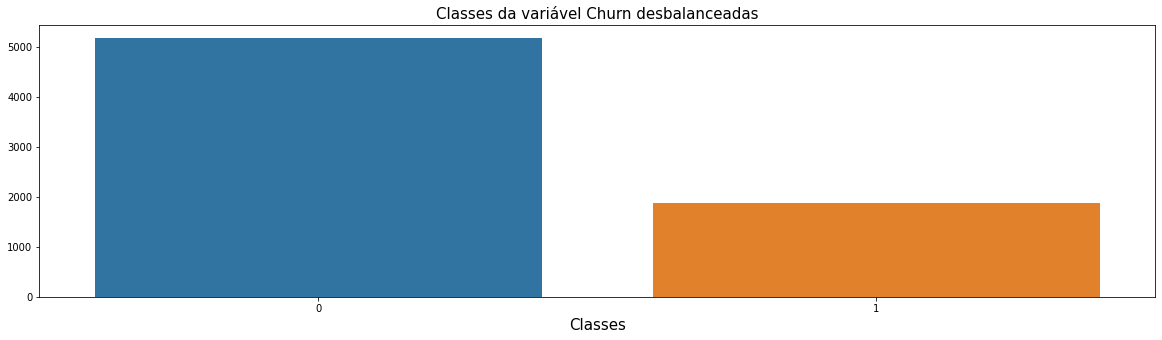

In [43]:
plt.figure(figsize=(20,5))
plt.title('Classes da variável Churn desbalanceadas', size=15)
sns.countplot(x='Churn', data=churn2)
plt.xlabel('Classes', size=15)
plt.ylabel('');

Rebalanceamento das classes com vários algoritmos de reamostragem de dados. Aqui irei aplicar model0s de Oversampling, de Undersampling e dessas duas técnicas de forma combinada. O proprio PyCaret irá realizar este trabalho por nós

Comum para todos os módulos do PyCaret, a função setup é a primeira e única etapa obrigatória em qualquer experimento de machine learning realizado no PyCaret. Esta função cuida de toda a preparação de dados necessária antes dos modelos de treinamento. Além de realizar algumas tarefas básicas de processamento padrão, o PyCaret também oferece uma ampla gama de recursos de pré-processamento. Para saber mais sobre todas as funcionalidades de pré-processamento do PyCaret, você pode ver este link.

In [44]:
!pip install sk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sk: filename=sk-0.0.1-py3-none-any.whl size=1884 sha256=527f96ee2f4048ceb188ee285f175684b7765080eb6402f7069d4807d6b36f5d
  Stored in directory: /root/.cache/pip/wheels/03/fc/1a/6062088fb352bff968cd400f1adba224f6d5413fc40ceaaf71
Successfully built sk


In [45]:
# instalando a biblioteca
!pip install pycaret -q

In [46]:
# configurando para o Colab
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [48]:
# init setup
from pycaret.classification import *
s = setup(churn, target = 'Churn')

,Description,Value
0,session_id,847
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(7043, 20)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,16
8,Ordinal Features,False
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Churn',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strate...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

Sempre que você inicializa a função setup no PyCaret, ele cria o perfil do conjunto de dados e infere os tipos de dados para todas as features de entrada. Nesse caso, você pode ver, exceto tenure, MonthlyCharges e TotalCharges, todo o resto é categórico, o que é correto, agora você pode pressionar "enter" para continuar. Se os tipos de dados não forem inferidos corretamente (o que pode acontecer às vezes), você pode usar numeric_feature e categorical_feature para substituir os tipos de dados.


## Treinamento e Selecionando o modelo
Agora que a preparação dos dados está concluída, vamos iniciar o processo de treinamento usando a funcionalidade compare_models. Esta função treina todos os algoritmos disponíveis na biblioteca de modelos e avalia várias métricas de desempenho usando validação cruzada (cross-validation).

In [49]:
# comparar todos os modelos
best_model = compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8057,0.8473,0.5285,0.6581,0.5854,0.4607,0.4659,0.492
gbc,Gradient Boosting Classifier,0.8018,0.8469,0.5020,0.6580,0.5683,0.4429,0.4504,1.023
lr,Logistic Regression,0.8012,0.8444,0.5230,0.6462,0.5774,0.4495,0.4542,1.245
lda,Linear Discriminant Analysis,0.8018,0.8419,0.5542,0.6374,0.5923,0.4624,0.4647,0.041
lightgbm,Light Gradient Boosting Machine,0.7984,0.8353,0.5215,0.6396,0.5739,0.4437,0.4481,0.384
nb,Naive Bayes,0.7426,0.8303,0.7724,0.5039,0.6097,0.4302,0.4523,0.020
rf,Random Forest Classifier,0.7974,0.8262,0.5004,0.6423,0.5619,0.4329,0.4389,0.598
et,Extra Trees Classifier,0.7805,0.7957,0.4825,0.5970,0.5329,0.3918,0.3960,0.553
dt,Decision Tree Classifier,0.7363,0.6634,0.5090,0.4952,0.5012,0.3223,0.3228,0.037
qda,Quadratic Discriminant Analysis,0.5773,0.6067,0.6672,0.3411,0.4507,0.1626,0.1875,0.040


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=847)
INFO:logs:compare_models() succesfully completed......................................


# Qual metrica vamos olhar? 
## O Que É ROC AUC?
ROC AUC é uma métrica de avaliação em machine learning usada para avaliar o desempenho de modelos de classificação.

Seu nome significa Área Sob A Curva Característica de Operação do Receptor.

Parece complicada, mas vou te explicar de maneira simples.

Pense nesta curva como um gráfico que mostra a fração de positivos verdadeiros no eixo Y e a fração de falsos positivos no eixo X para diferentes pontos de corte da previsão atribuída pelo modelo aos exemplos.

O AUC é a área sob esta curva.

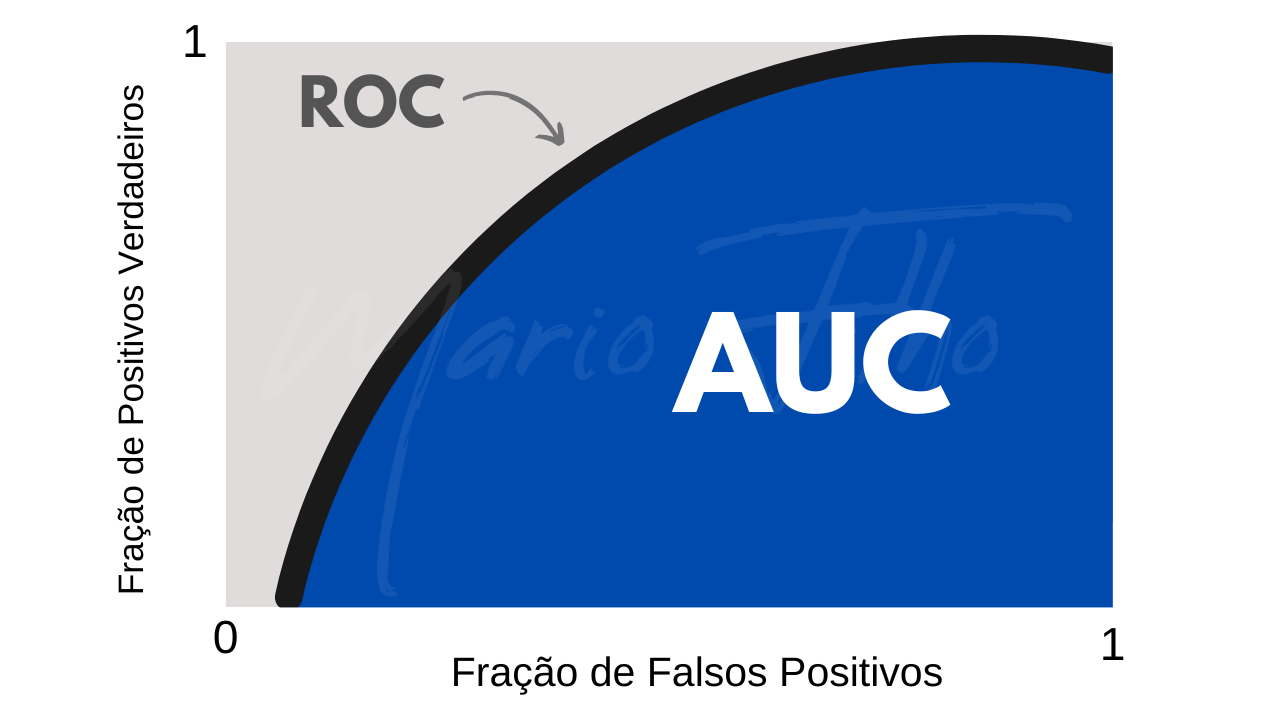

## Como Interpretar ROC AUC?
O ROC AUC indica o quão bom seu modelo é em ranquear exemplos positivos acima dos exemplos negativos.

A analogia que vou te contar abaixo me ajudou a entender de uma vez por todas como interpretar um valor de ROC AUC.

Imagine que você tenha duas caixas, uma com um cartão para cada um de seus exemplos positivos e outra com um cartão para cada um de seus exemplos negativos.

Em cada cartão está escrito a pontuação que o modelo atribuiu deste exemplo ser positivo.

Este número pode ser a probabilidade, mas isso não é obrigatório, já que a ROC AUC é uma medida mais preocupada com o ranqueamento de exemplos do que com a precisão matemática.

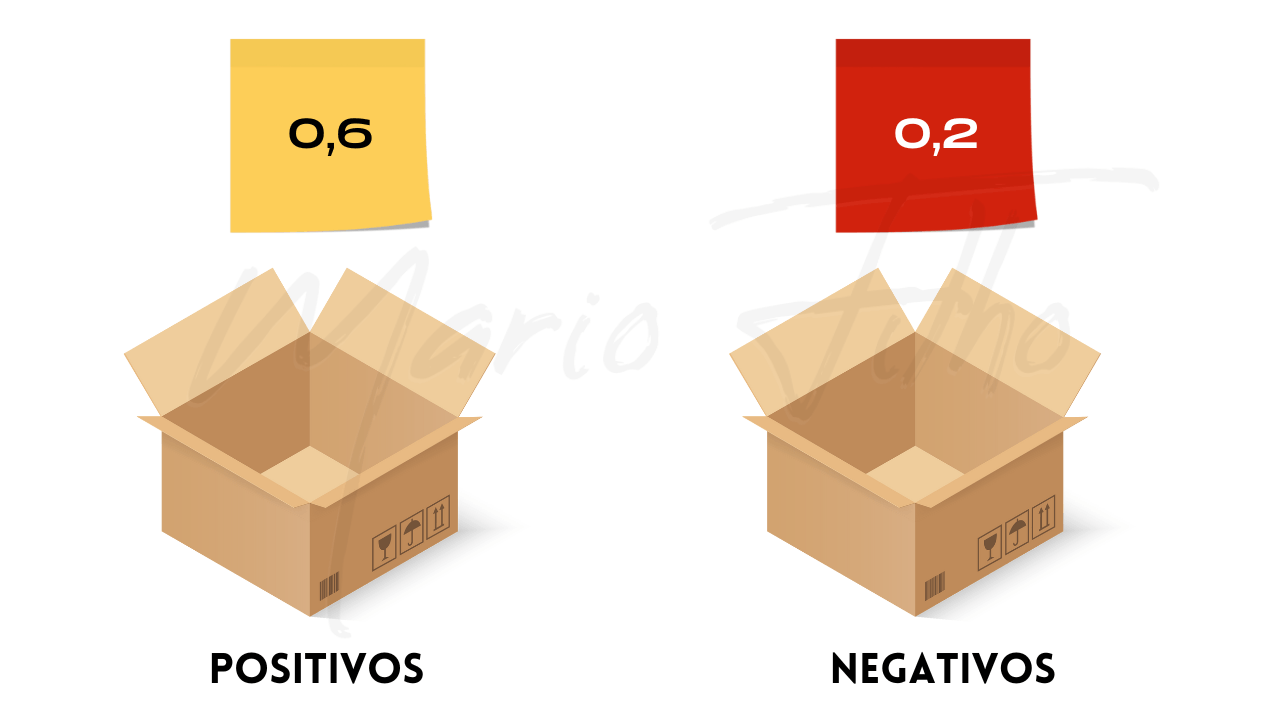

Você decide sortear um cartão positivo e um negativo por 5 vezes, sempre recolocando os cartões sorteados de volta nas caixas.

Após o sorteio, você faz uma tabela, indicando as probabilidades dos cartões sorteados cada vez que você os retirou das caixas.

Lembrando que as probabilidades não precisam somar um porque estamos falando de dois exemplos separados e não da probabilidade do mesmo exemplo ser da classe positiva ou negativa.

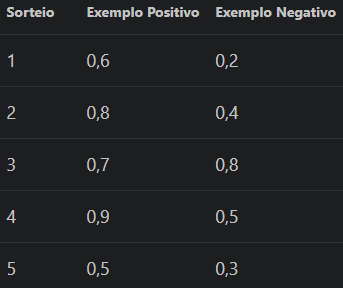

Agora você conta quantas vezes o exemplo positivo tinha uma pontuação maior do que o negativo e divide pelo número total de sorteios.

Neste caso 4/5 = 0,8. Este é o valor do ROC AUC.

Em resumo, quanto maior o valor do ROC AUC, melhor o modelo está ranqueando exemplos positivos acima dos negativos.

Ele costuma variar de 0,5 (significa que o modelo não tem qualquer poder preditivo) a 1,0 (significa que o modelo prevê as classes perfeitamente).

Na prática você encontra números menores que 0,5, indicando algum problema grave nos dados ou no algoritmo que você treinou.

**O melhor modelo baseado em AUC é Ada Boosting Classifier. O AUC usando validação cruzada de 10 vezes é 0,8473.**

In [50]:
# print best_model parameters
print(best_model)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=847)


## Ajuste de hiperparâmetros (tunning)
Você pode usar a função tune_model do PyCaret para ajustar automaticamente os hiperparâmetros do modelo.

In [51]:
# tune best model
tuned_best_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8195,0.8472,0.5194,0.7128,0.6009,0.4879,0.4981
1,0.7830,0.8443,0.5039,0.6019,0.5485,0.4071,0.4099
2,0.8012,0.8506,0.5349,0.6449,0.5847,0.4556,0.4590
3,0.7992,0.8147,0.5312,0.6355,0.5787,0.4483,0.4514
4,0.7951,0.8404,0.4375,0.6588,0.5258,0.4019,0.4156
5,0.8174,0.8568,0.5234,0.6979,0.5982,0.4832,0.4916
6,0.8316,0.8507,0.5469,0.7368,0.6278,0.5221,0.5318
7,0.8012,0.8559,0.5234,0.6442,0.5776,0.4494,0.4536
8,0.8235,0.8670,0.6094,0.6783,0.6420,0.5253,0.5267


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.15,
                   n_estimators=230, random_state=847)
INFO:logs:tune_model() succesfully completed......................................


**Observe que a AUC aumentou ligeiramente de 0.8473 para 0.8488.**

# Análise de Modelo

In [53]:
# avaliando o modelo
evaluate_model(tuned_best_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.15,
                   n_estimators=230, random_state=847), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

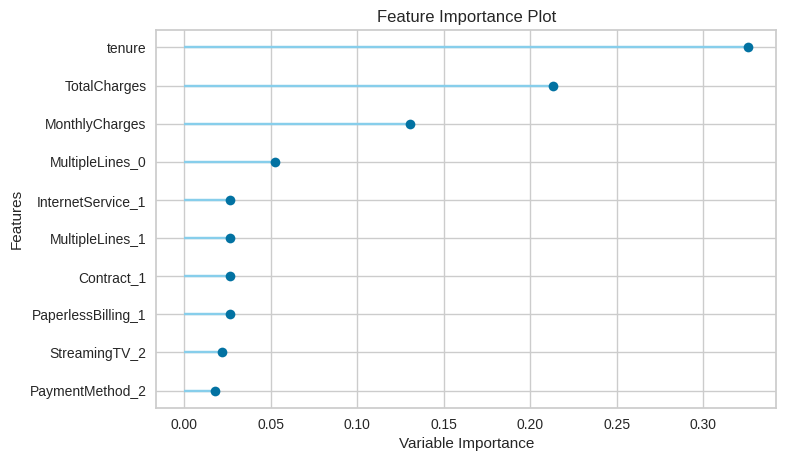

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [54]:
# Feature Importance Plot
plot_model(tuned_best_model, plot = 'feature')

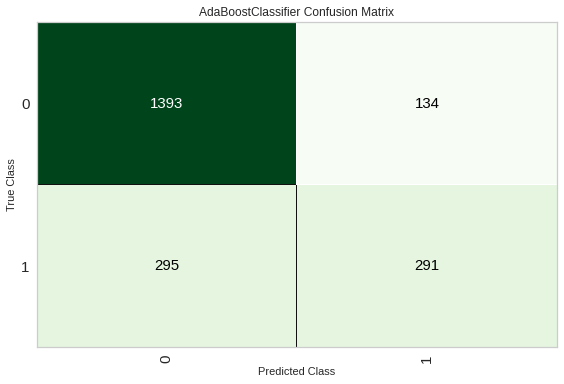

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [56]:
# Confusion Matrix
plot_model(tuned_best_model, plot = 'confusion_matrix')

Esta matriz de confusão está no conjunto de teste que inclui 30% de nossos dados (2.113 linhas). Temos 291 Positivos Verdadeiros (13%) - esses são os clientes para os quais seremos capazes de estender o valor da vida útil. Se não tivéssemos previsto, não haveria oportunidade de intervenção.

Também temos 134 (6,5%) Falsos Positivos onde perderemos dinheiro porque a promoção oferecida a estes clientes será apenas um custo extra.

1.393 (66,5%) são verdadeiros negativos (bons clientes) e 295 (13,5%) são Falsos Negativos (esta é uma oportunidade perdida).

Até agora, treinamos vários modelos para selecionar o melhor modelo com o AUC mais alto, seguido pelo ajuste dos hiperparâmetros do melhor modelo para reduzir um pouco mais o desempenho em termos de AUC. No entanto, o melhor AUC não se traduz necessariamente no melhor modelo de negócio.

Em um modelo de rotatividade, muitas vezes a recompensa dos Verdadeiros Positivos é muito diferente do custo dos Falsos Positivos . Vamos usar as seguintes suposições:

* Um voucher de 1.000 reais será oferecido a todos os clientes identificados como churn (Verdadeiro Positivo + Falso Positivo);
* Se conseguirmos interromper a rotatividade (churn), ganharemos 5.000 reais em valor de vida do cliente.

Usando essas suposições e a matriz de confusão acima, podemos calcular o valor de impacto deste modelo:

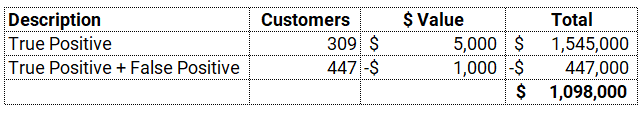

**É um bom modelo, mas o problema é que não é um modelo inteligente para os negócios. Está fazendo um trabalho muito bom se você não tiver um modelo, mas como podemos treinar e selecionar um modelo que maximize o valor do negócio. Para conseguir isso, temos que treinar, selecionar e otimizar modelos usando métricas de negócios em vez de qualquer métrica convencional como AUC ou Accuracy.**

## Adição de métricas personalizadas no PyCaret
Graças ao PyCaret, é extremamente fácil conseguir isso usando a função add_metric.

In [57]:
# create a custom function
def calculate_profit(y, y_pred):
    tp = np.where((y_pred==1) & (y==1), (5000-1000), 0)
    fp = np.where((y_pred==1) & (y==0), -1000, 0)
    return np.sum([tp,fp])

# add metric to PyCaret
add_metric('profit', 'Profit', calculate_profit)

Name                                                        Profit
Display Name                                                Profit
Score Function       <function calculate_profit at 0x7efe94fee9d0>
Scorer                               make_scorer(calculate_profit)
Target                                                        pred
Args                                                            {}
Greater is Better                                             True
Multiclass                                                    True
Custom                                                        True
Name: profit, dtype: object

Agora vamos executar a função compare_model se ver a magia.

In [58]:
# compare all models
best_model = compare_models(sort='Profit')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Profit,TT (Sec)
nb,Naive Bayes,0.7426,0.8303,0.7724,0.5039,0.6097,0.4302,0.4523,298700.0,0.021
lda,Linear Discriminant Analysis,0.8018,0.8419,0.5542,0.6374,0.5923,0.4624,0.4647,243900.0,0.060
ada,Ada Boost Classifier,0.8057,0.8473,0.5285,0.6581,0.5854,0.4607,0.4659,235900.0,0.289
lr,Logistic Regression,0.8012,0.8444,0.5230,0.6462,0.5774,0.4495,0.4542,231600.0,0.532
lightgbm,Light Gradient Boosting Machine,0.7984,0.8353,0.5215,0.6396,0.5739,0.4437,0.4481,229600.0,0.383
gbc,Gradient Boosting Classifier,0.8018,0.8469,0.5020,0.6580,0.5683,0.4429,0.4504,223800.0,0.692
rf,Random Forest Classifier,0.7974,0.8262,0.5004,0.6423,0.5619,0.4329,0.4389,221000.0,0.983
ridge,Ridge Classifier,0.8028,0.0000,0.4903,0.6643,0.5634,0.4400,0.4488,219800.0,0.035
et,Extra Trees Classifier,0.7805,0.7957,0.4825,0.5970,0.5329,0.3918,0.3960,205800.0,0.994
dt,Decision Tree Classifier,0.7363,0.6634,0.5090,0.4952,0.5012,0.3223,0.3228,194200.0,0.065


INFO:logs:create_model_container: 29
INFO:logs:master_model_container: 29
INFO:logs:display_container: 4
INFO:logs:GaussianNB(priors=None, var_smoothing=1e-09)
INFO:logs:compare_models() succesfully completed......................................


Observe que uma nova coluna Profit é adicionada desta vez, e surpreendentemente o modelo Naive Bayes, que é um modelo muito ruim em termos de AUC é um dos melhores modelos quando se trata de lucro. Vamos ver como:

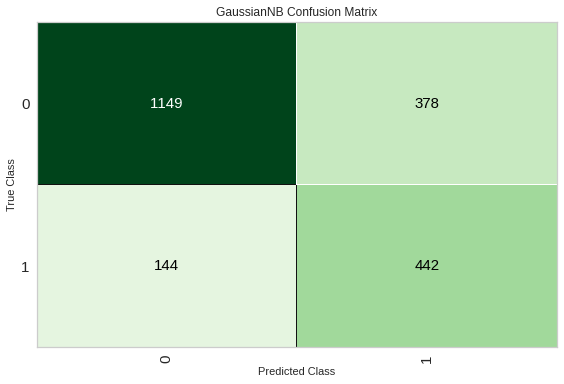

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [59]:
# confusion matrix
plot_model(best_model, plot = 'confusion_matrix')

O número total de clientes ainda é o mesmo (2.113 clientes no conjunto de teste), o que mudou agora é como o modelo está cometendo erros sobre falsos positivos e falsos negativos. Vamos colocar algum valor $ contra ele, usando as mesmas premissas (como acima):

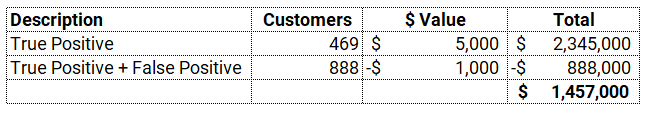

**Acabamos de aumentar o lucro em ~ $ 400.000 com um modelo que faz 2% menos em AUC do que o melhor modelo. Como isso acontece? Bem, para começar, AUC ou qualquer outra métrica de classificação out-of-the-box (Accuracy, Recall, Precision, F1, Kappa, etc.) não é uma métrica inteligente de negócios, portanto, não leva em consideração o risco e proposição de recompensa. Adicionar uma métrica customizada e usá-la para seleção ou otimização de modelo é uma ótima ideia e a maneira certa de prosseguir.**

#### Espero que você aprecie a simplicidade e facilidade de uso do PyCaret. Com apenas algumas linhas de código, fomos capazes de treinar vários modelos e selecionar aquele que é importante para os negócios. .